# Module Import

In [ ]:
from IPython.display import display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install mglearn
import mglearn

# 음수표현 라이브러리
plt.rcParams['axes.unicode_minus'] = False

# 경고무시
import warnings
warnings.filterwarnings("ignore")

# 매직명령어 : 시각화 결과가 노트북에 포함되도록
%matplotlib inline

# 문제 정의 및 데이터셋 로딩
- https://raw.githubusercontent.com/rickiepark/hg-mldl/master/wine.csv
- 와인 분류하는 문제: 화이트 와인과 레드와인
- 로지스틱 회귀로 와인 분류

In [ ]:
wine = pd.read_csv('https://raw.githubusercontent.com/rickiepark/hg-mldl/master/wine.csv')
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [ ]:
wine.describe()
# 스케일링을 해줘야 한다.

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [ ]:
wine['class'].unique()

array([0., 1.])

In [ ]:
# 우리가 분류하려는 클래스의 0과 1의 수가 불균형한지 검사하자.
wine['class'].value_counts()
# 차이가 크다.

1.0    4898
0.0    1599
Name: class, dtype: int64

In [ ]:
wine.columns

Index(['alcohol', 'sugar', 'pH', 'class'], dtype='object')

In [ ]:
wine_input = wine[['alcohol', 'sugar', 'pH']].to_numpy() # 사이킷런으로 작업하려면 array로 바꿔줘야 한다.
wine_target = wine[['class']].to_numpy()

In [ ]:
wine_input.shape, wine_target.shape

((6497, 3), (6497, 1))

# 데이터 탐색 및 전처리

## 피처 스케일링

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

input_scaler = StandardScaler().fit_transform(wine_input)

## 훈련세트와 테스트세트 분리

In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target, = train_test_split(
    input_scaler, wine_target, test_size= 0.2 ,stratify = wine_target, random_state=42)

# K-최근접 이웃 분류기 모델 구축

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(train_input, train_target)

KNeighborsClassifier()

In [ ]:
# 훈련데이터의 결정계수를 추출
knn.score(train_input, train_target)

0.9030209736386376

In [ ]:
knn.score(test_input, test_target)

0.8415384615384616

- 훈련데이터 점수가 더 높으니 **과대적합**이다.
- 모델을 더 복잡하게 만들자. (과소든 과대든 복잡하게 해서 해결하는듯...)

In [ ]:
# 모델을 복잡하게 만들기 위해 이웃수를 3으로 줄인다.
knn.n_neighbors = 3

# 모델을 다시 학습시킨다.
knn.fit(train_input, train_target)


KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn.score(train_input, train_target)

0.9297671733692515

In [ ]:
knn.score(test_input, test_target)

0.8407692307692308

- 이 모델은 걍 뭘해도 구린듯

In [ ]:
pred = knn.predict(test_input)
pred_proba = knn.predict_proba(test_input)[:, 1]

In [ ]:
test_target

array([[1.],
       [1.],
       [1.],
       ...,
       [0.],
       [1.],
       [1.]])

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, roc_curve, precision_recall_curve

In [ ]:
# get(실제값, 예측값, 예측확률)
def get(test_target, pred=None, pred_proba=None):
    confusion = confusion_matrix(test_target, pred)
    accuracy = accuracy_score(test_target, pred)
    precision = precision_score(test_target, pred)
    recall = recall_score(test_target, pred)
    f1 = f1_score(test_target, pred)
    roc_auc = roc_auc_score(test_target, pred_proba)

    print('오차 행렬(혼돈 행렬)')
    print(confusion)

    print(f'정확도:{accuracy:.4f}, 정밀도:{precision:.4f}, 재현율:{recall:.4f}, F1:{f1:.4f}, AUC:{roc_auc:.4f}')

In [ ]:
get(test_target, pred, pred_proba)

오차 행렬(혼돈 행렬)
[[228  92]
 [115 865]]
정확도:0.8408, 정밀도:0.9039, 재현율:0.8827, F1:0.8931, AUC:0.8681


# 로지스틱 회귀 모델 구축

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()
lr.fit(train_input, train_target)
pred = lr.predict(test_input)
pred_proba = lr.predict_proba(test_input)[:, 1]

In [ ]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.7829517029055224
0.7761538461538462


In [ ]:
get(test_target, pred, pred_proba)

오차 행렬(혼돈 행렬)
[[115 205]
 [ 86 894]]
정확도:0.7762, 정밀도:0.8135, 재현율:0.9122, F1:0.8600, AUC:0.8232


- 과소적합 발생
- 훈련 데이터에 있는 패턴의 편향이 크다는 의미
- 높은 분산은 과대적합에 비례, 높은 편향은 과소적합에 비례
- 분산: 특정 샘플에 대한 예측의 일관성 측정
- 편향: 다른 훈련 데이터셋에서 여러분 훈련했을 때 예측의 정확한 값에서 얼마나 벗어났는지 측정

In [ ]:
lr = LogisticRegression(C= 0.1)
lr.fit(train_input, train_target)
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.7827592842024245
0.7769230769230769


- 별 차이가 없다. 화이트와인과 레드와인의 편향이 너무 크다.

**과소적합(underfitting)**
- 모델이 너무 단순해서 데이터의 내재적인 구조를 학습하지 못할 때 발생
- 모델 파라미터가 더 많은 강력한 모델을 선택한다.
- 학습 알고리즘에 더 좋은 특성을 제공한다.
- 모델의 제약을 줄인다.

**과대적합(overfitting)**
- 훈련 데이터에 있는 잡음의 양에 비해 모델이 너무 복잡할 때 일어난다.
- 파라미터 수가 적은 모델을 선택하거나, 훈련 데이터에 있는 특성 수를 줄이거나, 모델에 제약을 가하여 단순화시킨다.
- 훈련 데이터를 더 많이 모은다.
- 훈련 데이터의 잡음을 줄인다(이상치 제거, 결측치 처리, 다중 공선성 처리 등)

In [ ]:
print(lr.coef_, lr.intercept_)

[[ 0.54710953  1.57716153 -0.70401097]] [1.75307403]


# 의사결정나무(Decision Tree)

- 직관적으로 이해하기 위한 알고리즘
- 트리기반의 분류 규칙을 만들어내는 알고리즘
- 의사결정나무의 가장 큰 단점은 과적합으로 정확도가 떨어질 수 있다.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state= 42)
dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.9978833942659227
0.8646153846153846


- 과대적합 발생

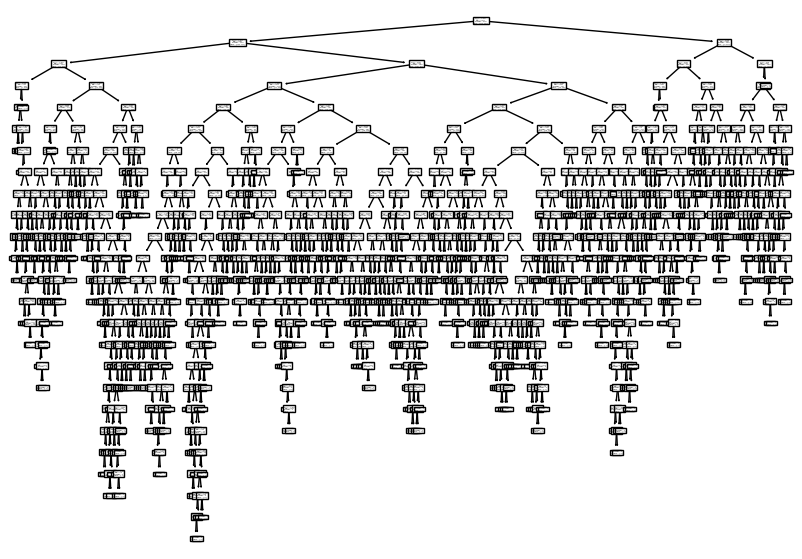

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(10, 7))
plot_tree(dt)
plt.show()

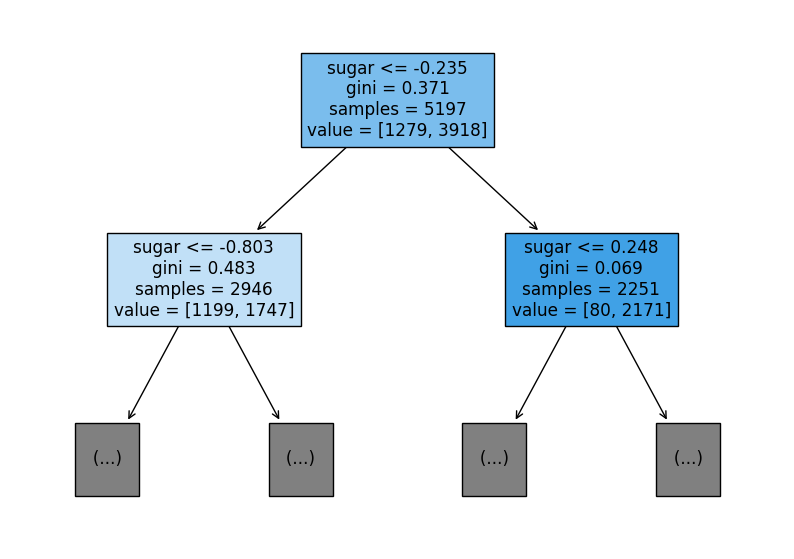

In [ ]:
plt.figure(figsize=(10, 7))
plot_tree(dt, max_depth= 1, filled= True, feature_names= ['alcohol', 'sugar', 'pH'])
plt.show()

**불순도(Gini Impurity)**
- criterion 매개변수의 기본값 'gini'
- 데이터를 분할하는 기준을 정하는 것
- 지니 불순도라고 부름
- 지니 불순도 = 1 -(음성클래스 비율의 제곱 + 양성클래스 비율의 제곱)
- 결정트리 모델은 부모 노드와 자식 노드의 불순도 차이가 크도록 트리를 성장
- 지니불순도가 0이 되면 클래스가 결정된다.

**정보이득(Information gain)**
- 부모와 자식 노드 사이의 불순도 차이

**가지치기(prunting)**
- 최대 트리로 형성된 결정트리의 특정 노드 밑의 트리를 제거하여 일반화 성능을 높이는 것
- 과적합을 막기 위해 사용된다.
- 더 많은 가지가 생기지 않도록 트리의 최대 깊이, leaf 노드의 최대계수, 한 노드가 분할하기 위한 최소 데이터 수를 제한한다.

In [ ]:
dt = DecisionTreeClassifier(max_depth= 3, random_state= 42)
dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8458726188185491
0.8407692307692308


- 점수가 좋지는 않다.

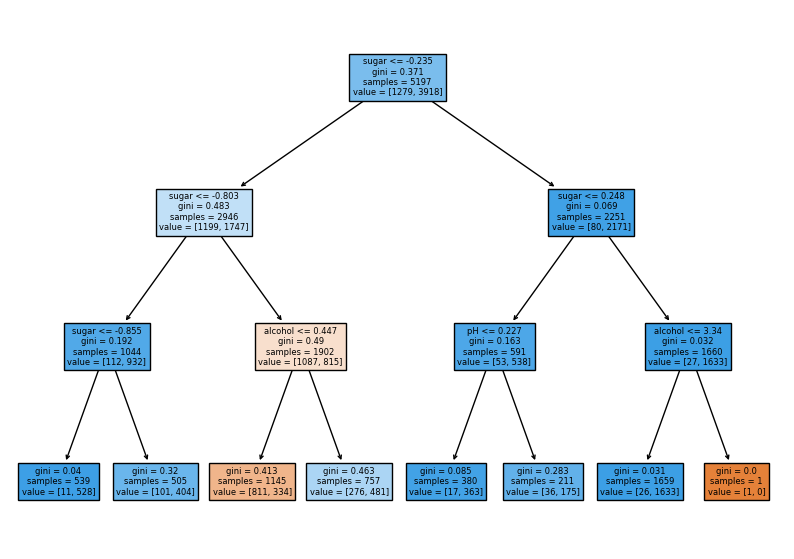

In [ ]:
plt.figure(figsize=(10, 7))
plot_tree(dt, filled= True, feature_names= ['alcohol', 'sugar', 'pH'])
plt.show()

In [ ]:
# 특성중요도: 결정트리가 어떤 특성을 가장 중요하게 사용하였는지를 나타냄
dt.feature_importances_

array([0.14086835, 0.85360568, 0.00552597])

## 트리 구조를 시각화하는 패키지 Graphviz

In [ ]:
from sklearn.tree import export_graphviz

# export_graphbiz(모델객체, 출력파일명, 결정트리클래스명, 결정트리피처명)

export_graphviz(dt,out_file='tree.dot', impurity= True)

In [ ]:
# open(filename, mode)
# mode: r, w, a

with open('tree.dot', mode='r') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)


AttributeError: ignored

DecisionTreeClassifier(max_depth=3, random_state=42)